<a href="https://colab.research.google.com/github/lfreedom2750/MathematicsForComputerScience/blob/main/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris

In [156]:
import pandas as pd

In [157]:
iris = load_iris()

In [158]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [159]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [160]:
# design matrix
X = iris.data

In [161]:
# targets
y = iris.target

In [162]:
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['label'] = pd.Series(iris.target_names[y], dtype='category')

In [163]:
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         label  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

In [164]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

<Axes: xlabel='petal length', ylabel='petal width'>

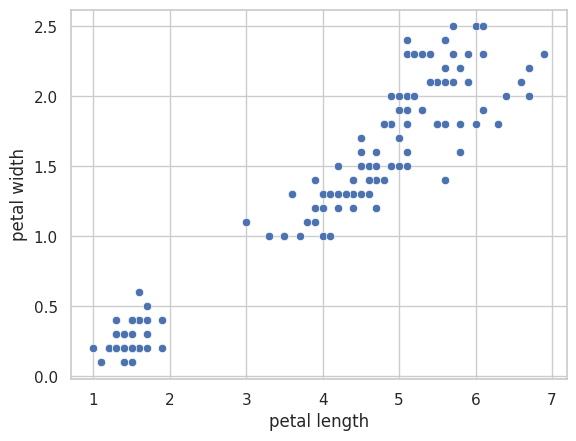

In [165]:
sns.scatterplot(data=df, x='petal length', y='petal width')

In [166]:
palette = {'setosa': 'orange', 'versicolor': 'green', 'virginica': 'purple'}

<Axes: xlabel='petal length', ylabel='petal width'>

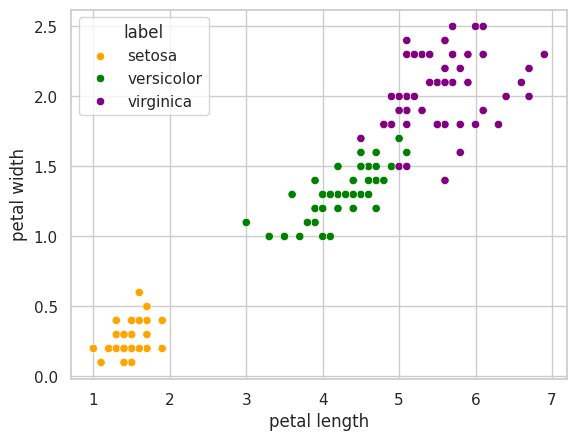

In [167]:
sns.scatterplot(data=df, x='petal length', y='petal width', hue='label', palette=palette)

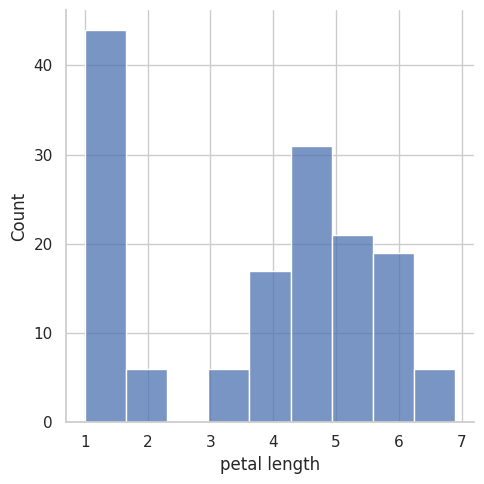

In [168]:
sns.displot(data=df, x='petal length')

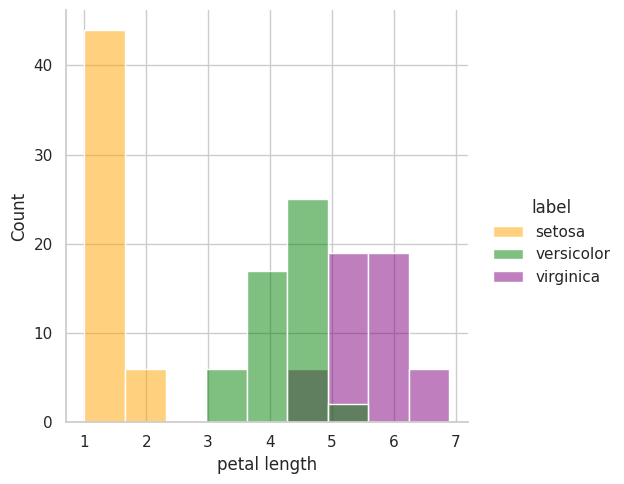

In [169]:
sns.displot(data=df, x='petal length', hue='label', palette=palette)

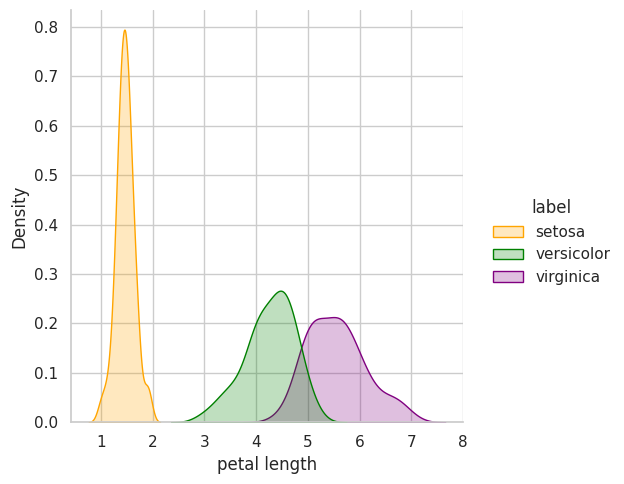

In [170]:
sns.displot(data=df, x='petal length', hue='label', palette=palette, kind='kde', fill=True)

<ipython-input-171-6190c6f03f36>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x='petal length', palette=palette, kind='kde', fill=True)


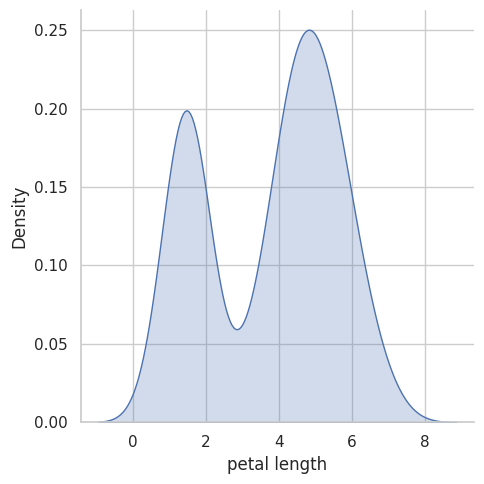

In [171]:
sns.displot(data=df, x='petal length', palette=palette, kind='kde', fill=True)

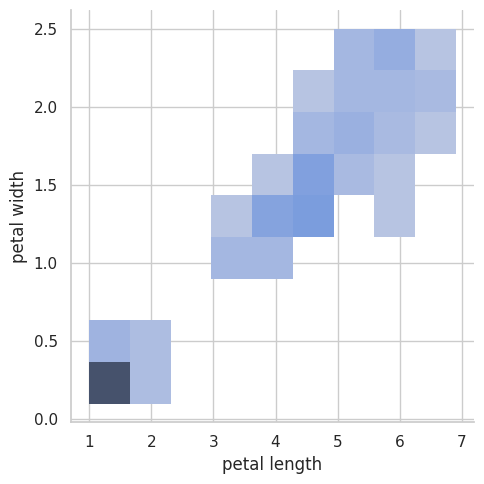

In [172]:
sns.displot(data=df, x='petal length', y='petal width')

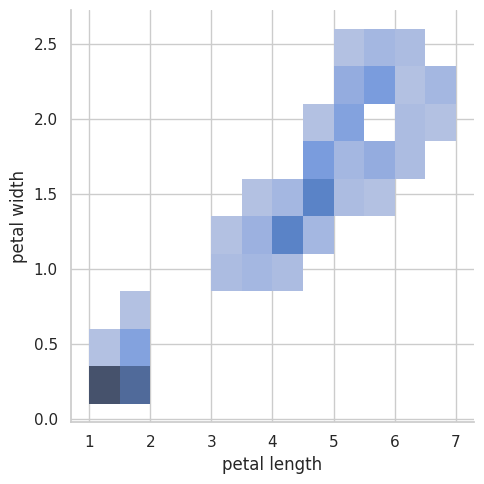

In [173]:
sns.displot(data=df, x='petal length', y='petal width', binwidth=(0.5, 0.25))

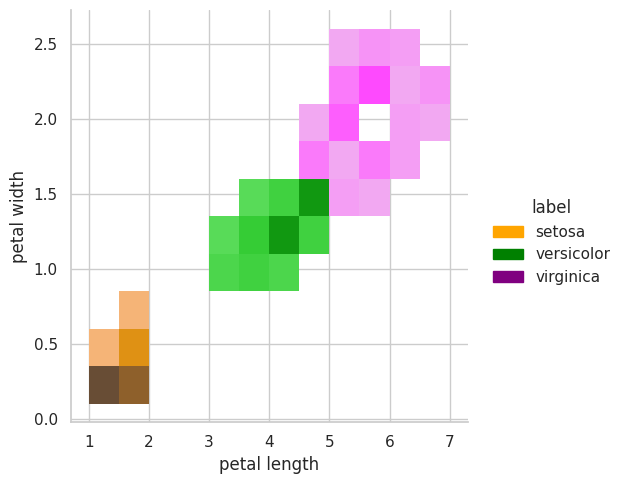

In [174]:
sns.displot(data=df, x='petal length', y='petal width', binwidth=(0.5, 0.25), hue='label', palette=palette)

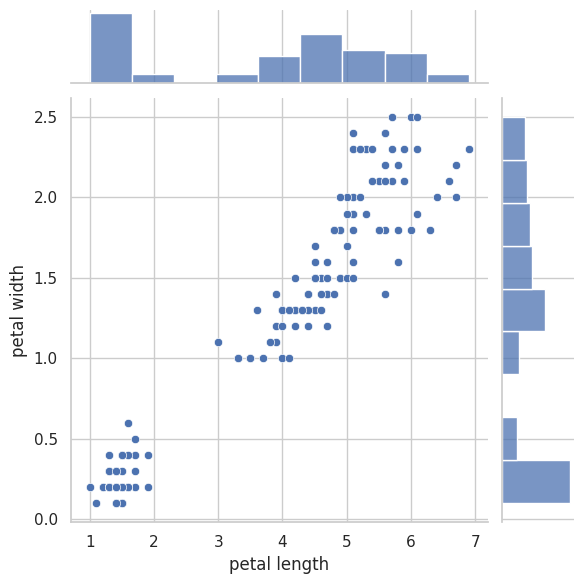

In [175]:
sns.jointplot(data=df, x='petal length', y='petal width')

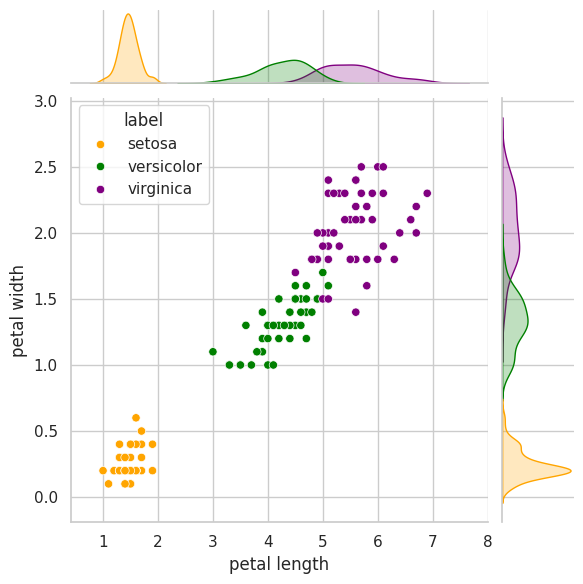

In [176]:
sns.jointplot(data=df, x='petal length', y='petal width', hue='label', palette=palette)

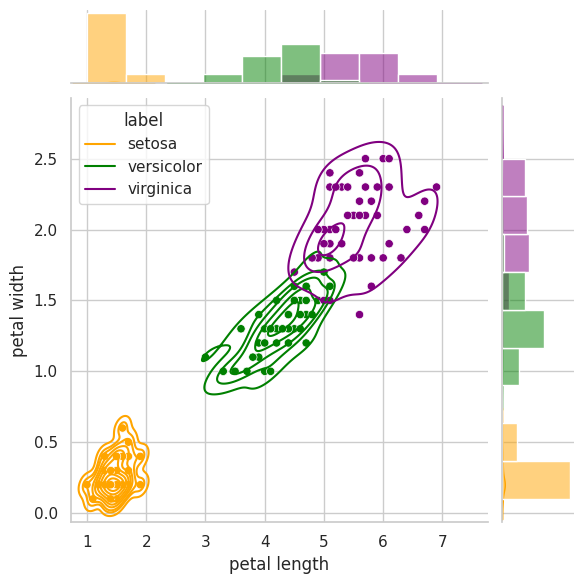

In [177]:
g = sns.jointplot(data=df, x='petal length', y='petal width', hue='label', palette=palette)
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

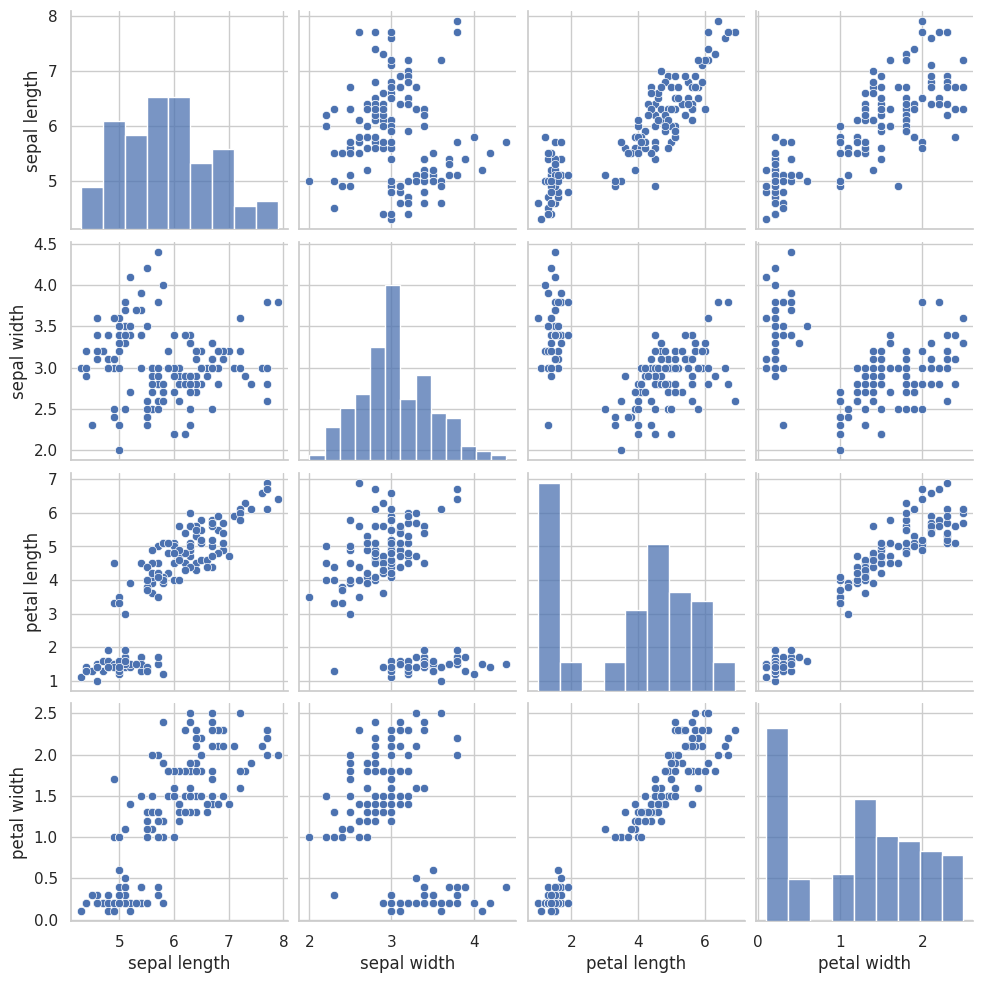

In [178]:
sns.pairplot(data=df, vars=df.columns[0:4])

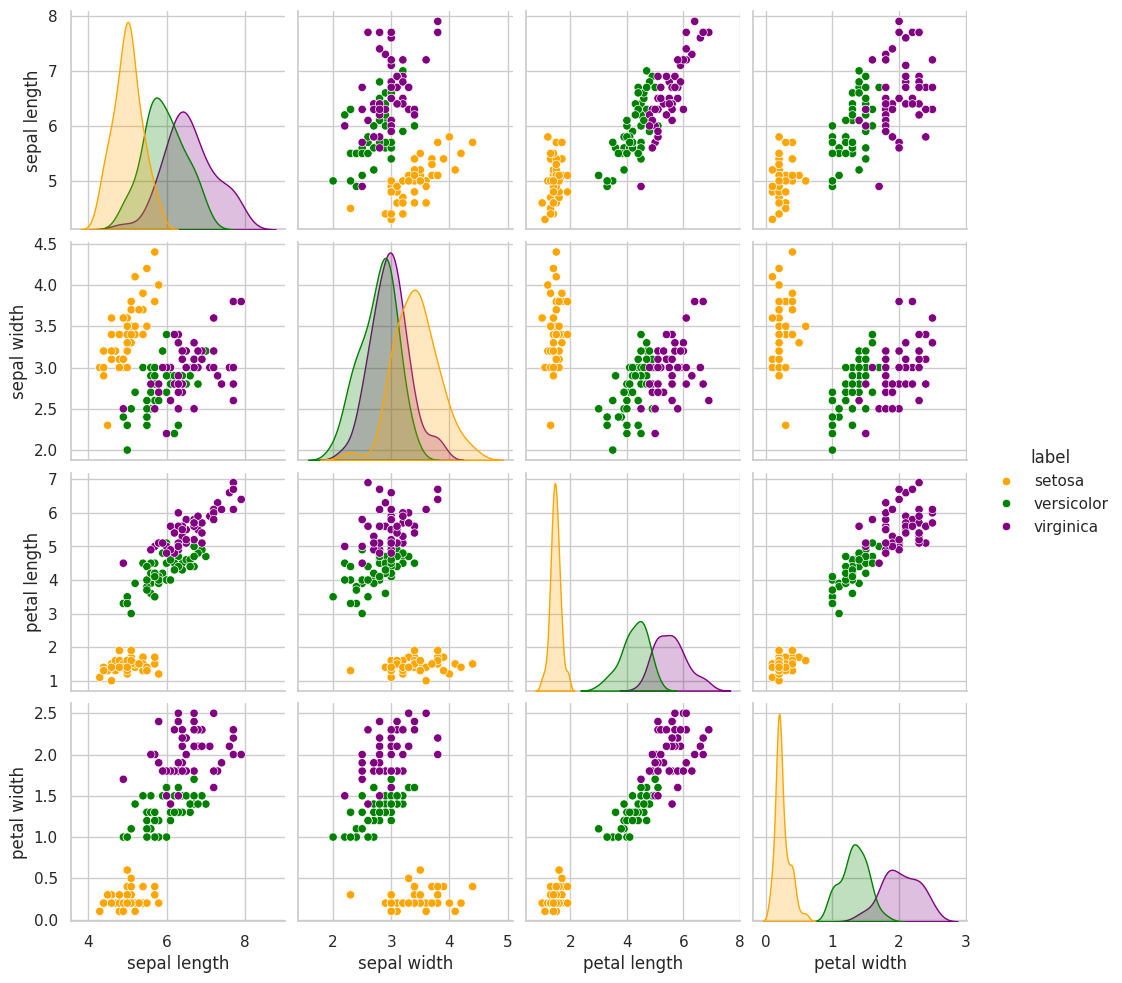

In [179]:
sns.pairplot(data=df, vars=df.columns[0:4], hue='label', palette=palette)
plt.savefig('iris.pdf')

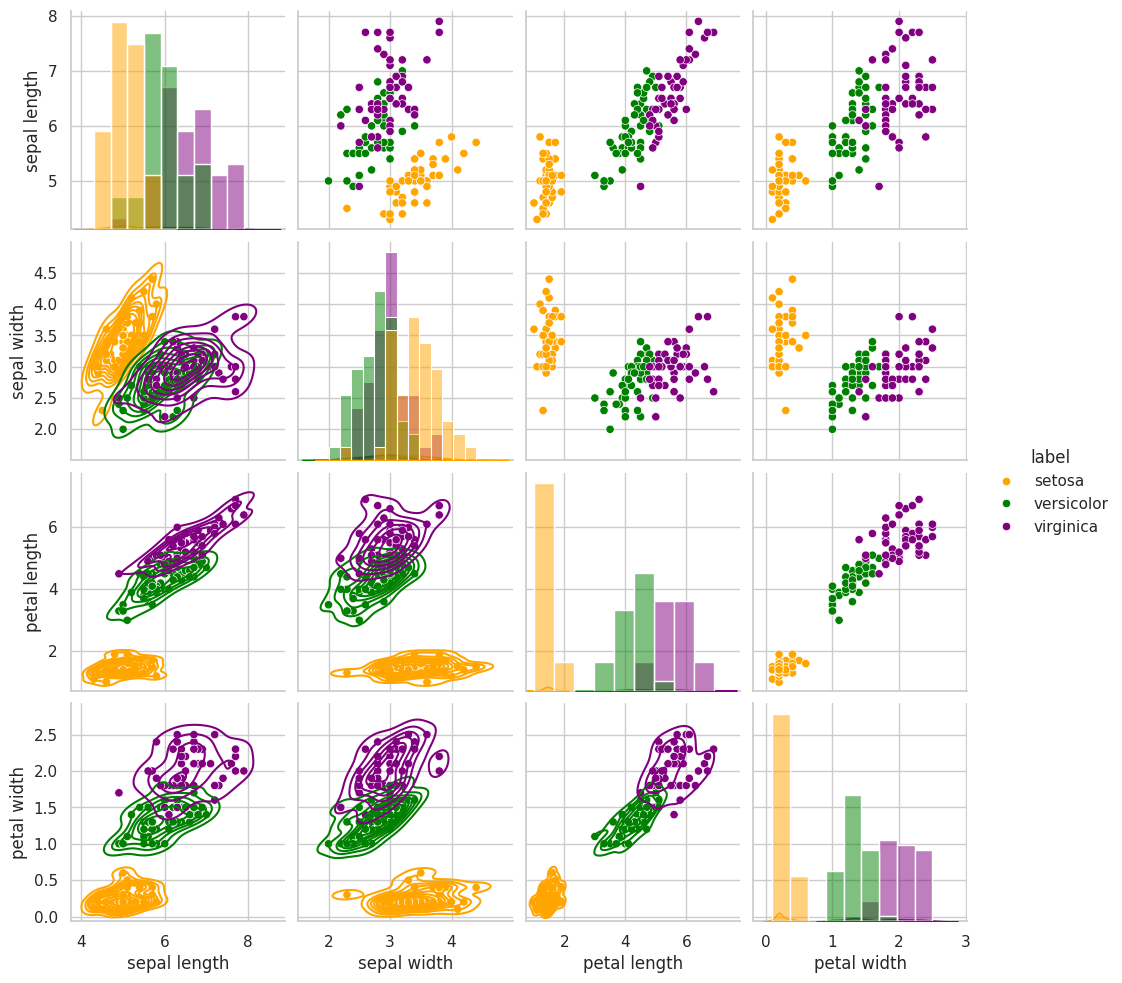

In [180]:
g = sns.pairplot(data=df, vars=df.columns[0:4], hue='label', palette=palette)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)

In [181]:
from sklearn.tree import DecisionTreeClassifier

In [182]:
from graphviz import Source
from sklearn.tree import export_graphviz

In [183]:
model = DecisionTreeClassifier(max_depth=2, random_state=23520899)
model.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=23520899)

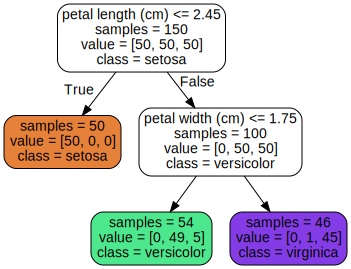

In [184]:
export_graphviz(model, out_file='iris.dot', feature_names=iris.feature_names, class_names=iris.target_names, impurity=False,
                filled=True, rounded=True)
Source.from_file('iris.dot')

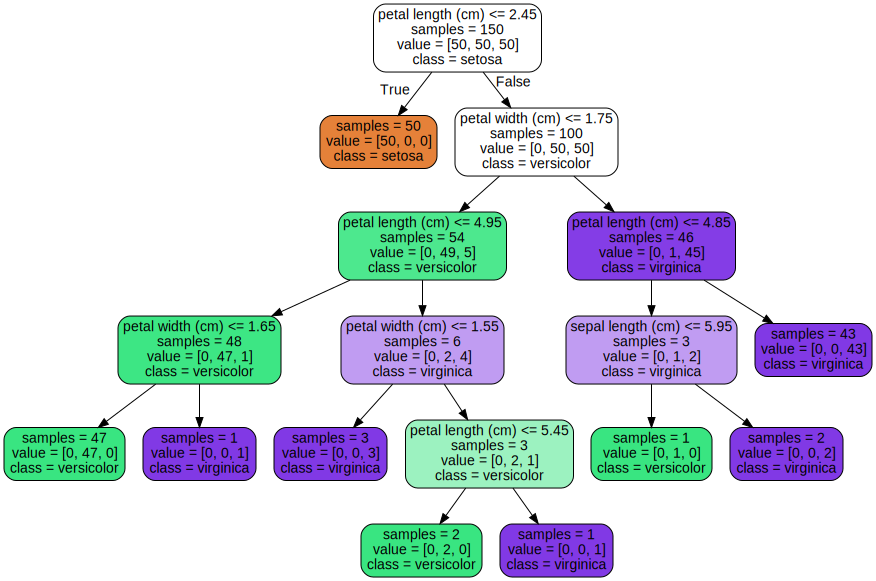

In [185]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)
export_graphviz(model, out_file='iris.dot', feature_names=iris.feature_names, class_names=iris.target_names, impurity=False,
                filled=True, rounded=True)
Source.from_file('iris.dot')

**BỘ DỮ LIỆU PALMER PENGUINS**

Bộ dữ liệu được thu thập từ năm 2007 đến năm 2009 bởi Tiến Sĩ Kristen Gorman thuộc chương trình  Palmer Station Long Term Ecological Research Program, một phần của the US Long Term Ecological Research Network.

Bộ dữ liệu bao gồm các phép đo kích thước của ba loài chim cánh cụt được quan sát trên ba hòn đảo quần đảo Palmer Penguins.

Giải thích các thuộc tính:
- species: Loài chim cánh cụt
- island: Hòn đảo mà chim cánh cụt được tìm thấy
- bill_length_mm: Chiều dài mỏ của chim cánh cụt (mm)
- bill_depth_mm: Độ sâu của mỏ chim cánh cụt (mm)
- flipper_length_mm: Chiều dài vây cánh của chim cánh cụt (mm)
- body_mass_g: Khối lượng cơ thể của chim cánh cụt (gam)
- sex: Giới tính của chim cánh cụt (Male hoặc Female)




In [186]:
penguins = sns.load_dataset('penguins')

In [187]:
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

Số lượng dòng và số lượng cột của bộ dữ liệu trên lần lượt là 344 dòng và 7 cột.

**CÁC BIỂU ĐỒ ĐƯỢC GIỚI THIỆU TRONG FILE HƯỚNG DẪN**

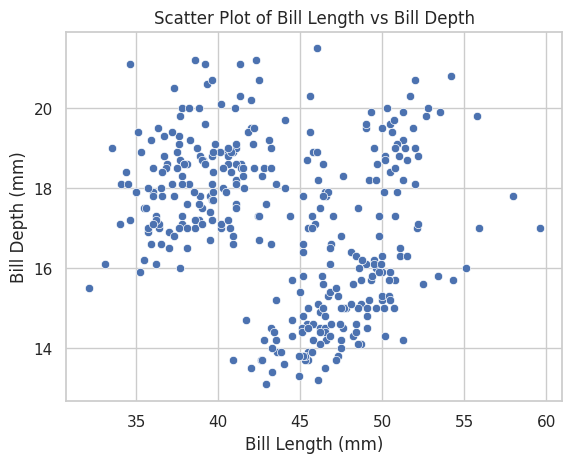

In [188]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')

plt.title('Scatter Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

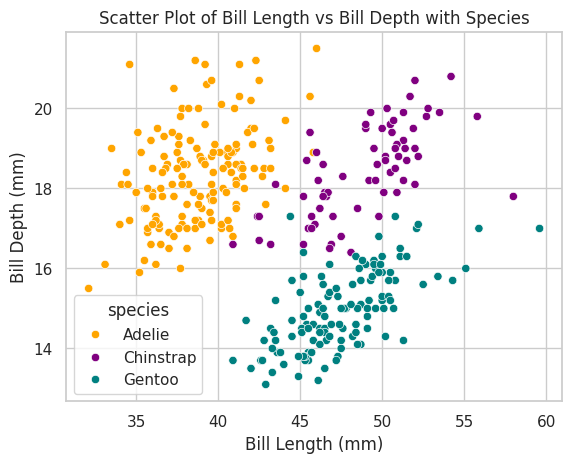

In [189]:
palette = {'Adelie': 'orange', 'Chinstrap': 'purple', 'Gentoo': 'teal'}

sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', palette=palette)

plt.title('Scatter Plot of Bill Length vs Bill Depth with Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

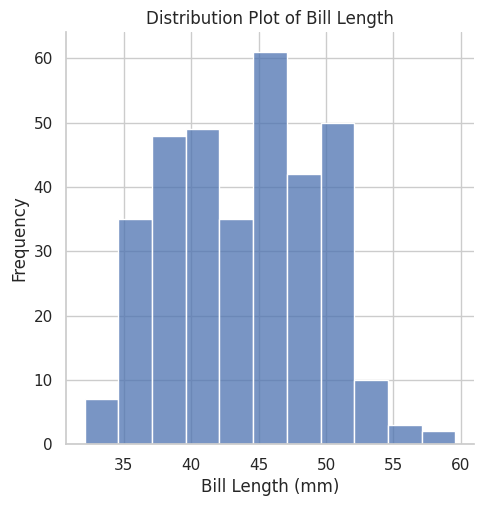

In [190]:
sns.displot(data=penguins, x='bill_length_mm')

plt.title('Distribution Plot of Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.show()

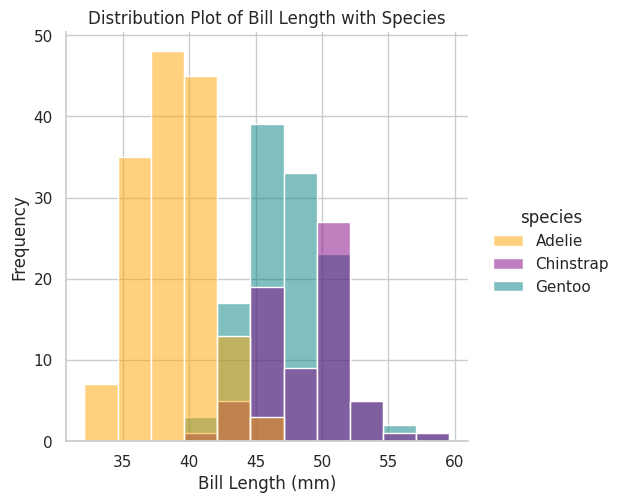

In [191]:
sns.displot(data=penguins, x='bill_length_mm', hue='species', palette=palette)

plt.title('Distribution Plot of Bill Length with Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.show()

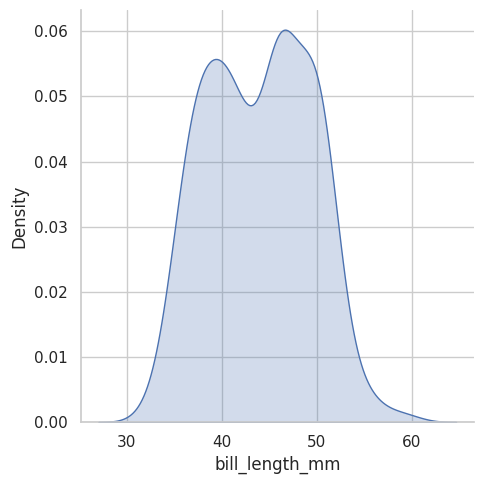

In [192]:
sns.displot(data=penguins, x='bill_length_mm', kind='kde', fill=True)

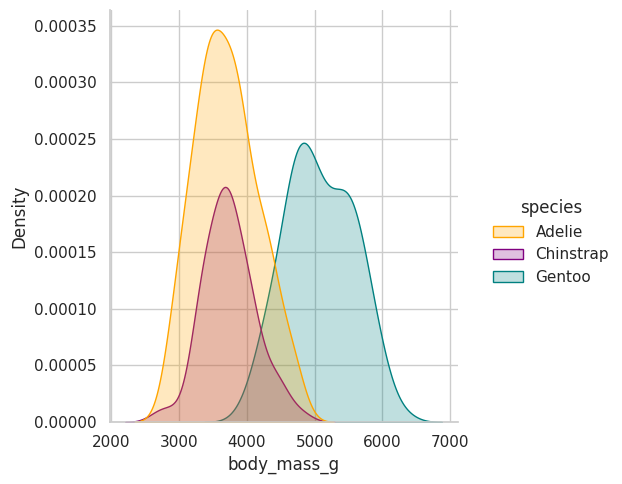

In [193]:
sns.displot(data=penguins, x='body_mass_g', hue='species', palette=palette, kind='kde', fill=True)

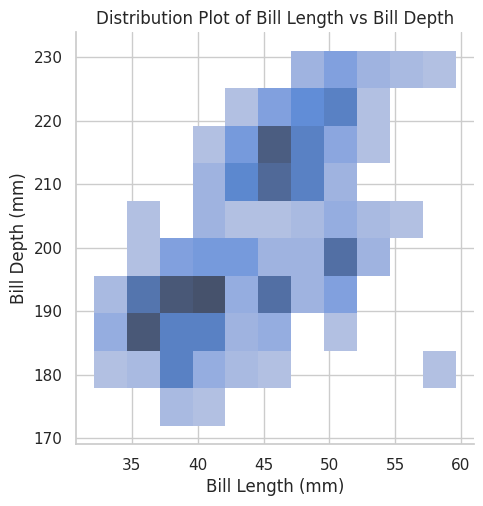

In [194]:
sns.displot(data=penguins, x='bill_length_mm', y='flipper_length_mm')

plt.title('Distribution Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

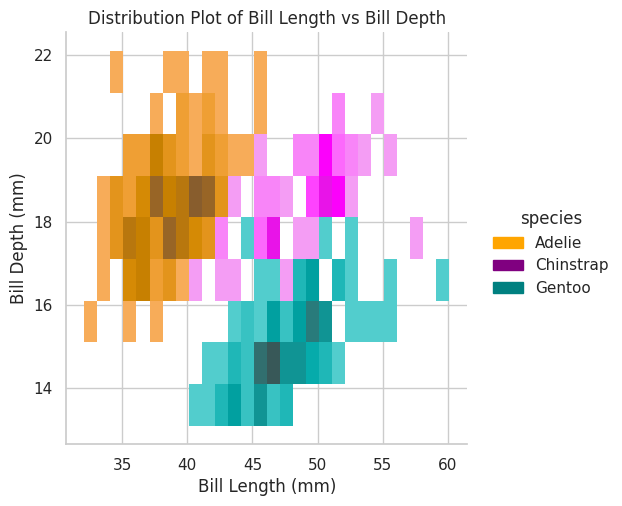

In [195]:
sns.displot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', binwidth=(1.0, 1.0), palette=palette)

plt.title('Distribution Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

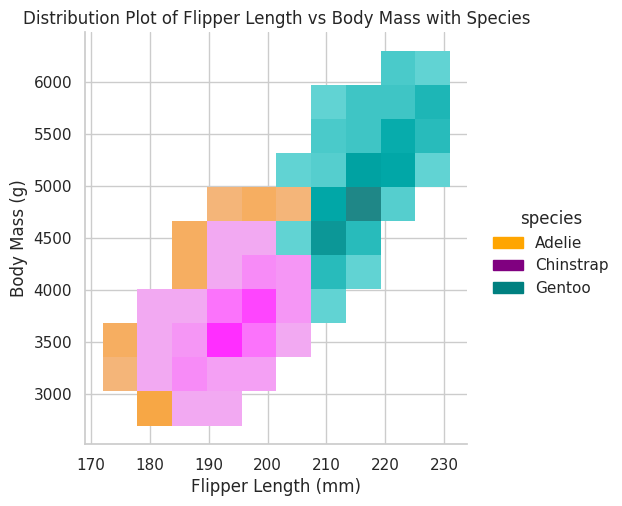

In [196]:
sns.displot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species', palette=palette)

plt.title('Distribution Plot of Flipper Length vs Body Mass with Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

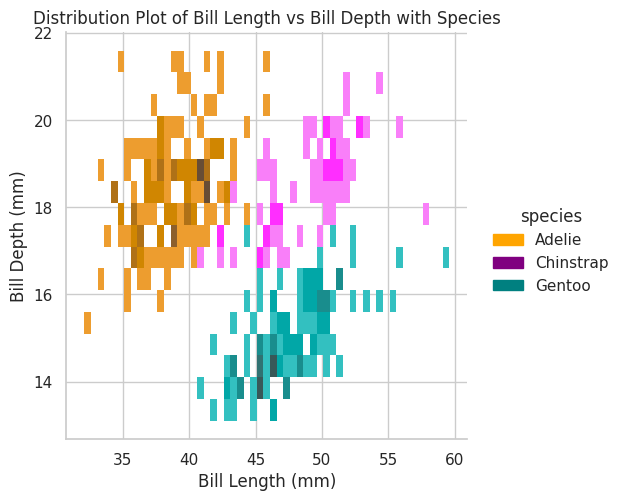

In [197]:
sns.displot(data=penguins, x='bill_length_mm', y='bill_depth_mm', binwidth=(0.5, 0.5), hue='species', palette=palette)

plt.title('Distribution Plot of Bill Length vs Bill Depth with Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

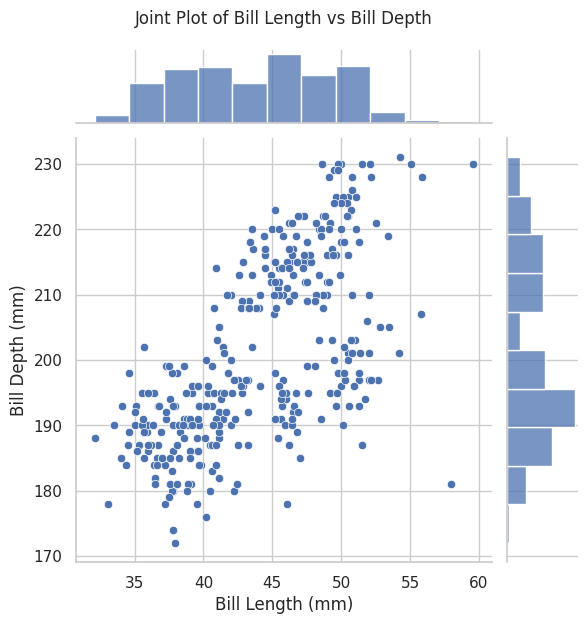

In [198]:
sns.jointplot(data=penguins, x='bill_length_mm', y='flipper_length_mm')

plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Joint Plot of Bill Length vs Bill Depth', y=1.25)
plt.show()

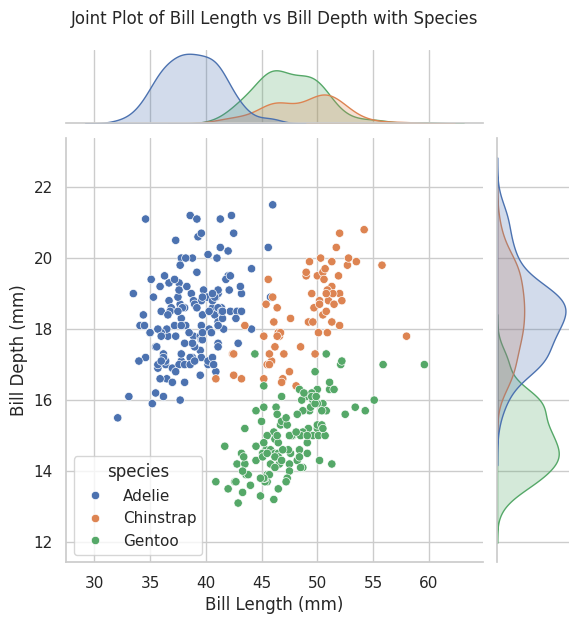

In [199]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Joint Plot of Bill Length vs Bill Depth with Species', y=1.25)
plt.show()

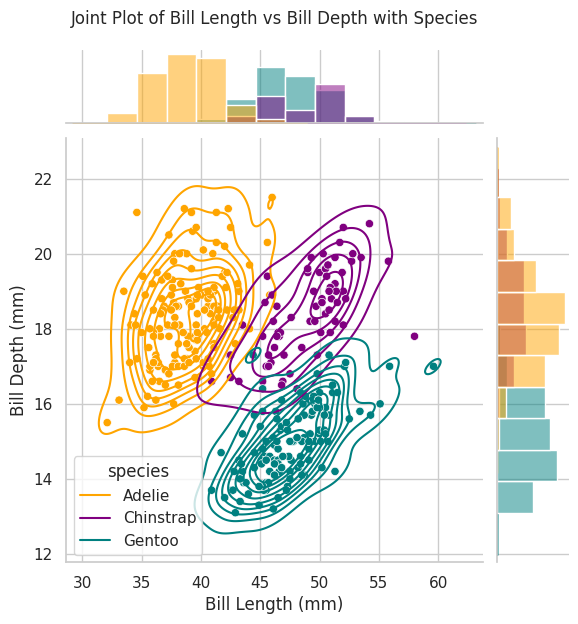

In [200]:
g = sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', palette=palette)
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Joint Plot of Bill Length vs Bill Depth with Species', y=1.25)
plt.show()

**Nhận xét:**

- Biểu đồ jointplot dạng contour (đường đẳng mức) với các điểm dữ liệu được phân loại theo loài chim cánh cụt (species).

- Loài Adelie và Gentoo có sự khác biệt rõ ràng nhất, với Adelie có mỏ ngắn và sâu, còn Gentoo có mỏ dài và nông.

- Loài Chinstrap nằm ở giữa, với đặc điểm mỏ có sự giao thoa giữa hai loài còn lại, nhưng vẫn có vùng phân biệt.

In [201]:
penguins.columns = ['species', 'island', 'bill length', 'bill depth', 'flipper length', 'body mass', 'sex']

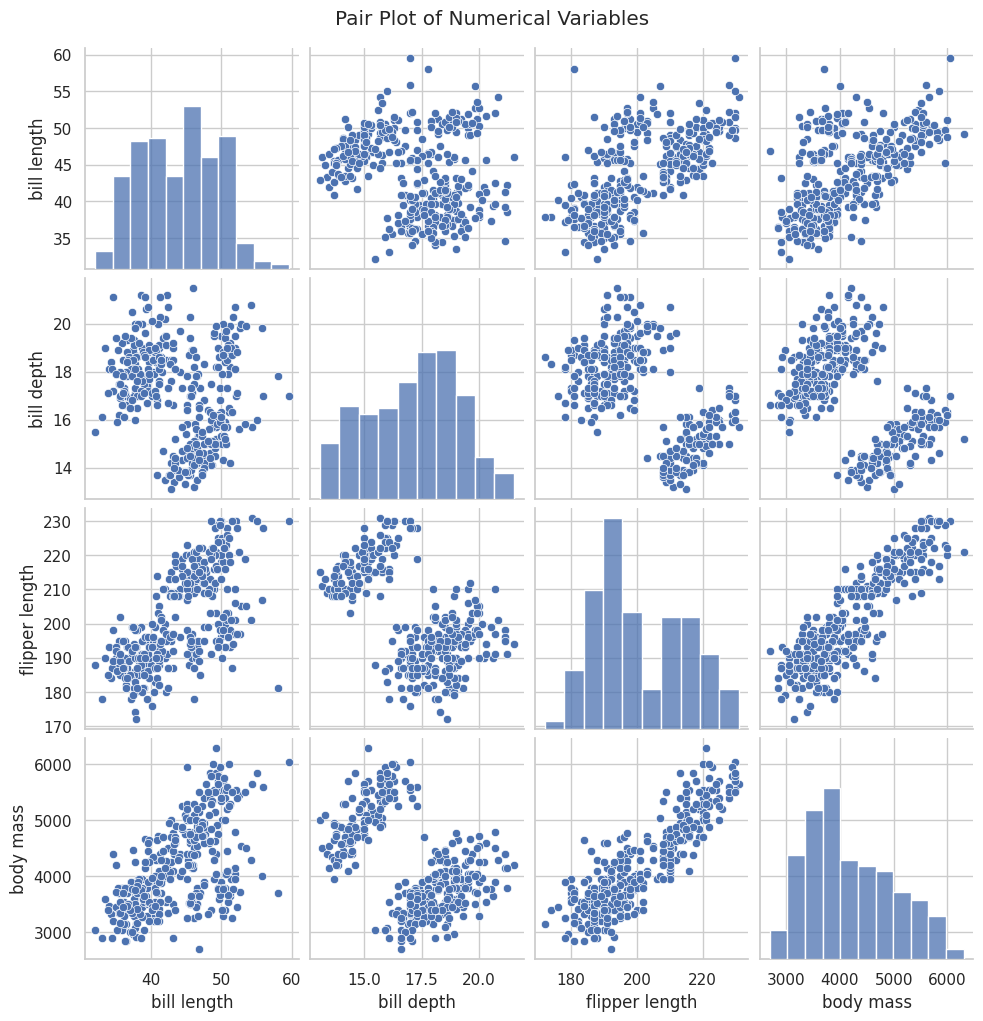

In [202]:
sns.pairplot(data=penguins, vars=penguins.columns[2:6])

plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

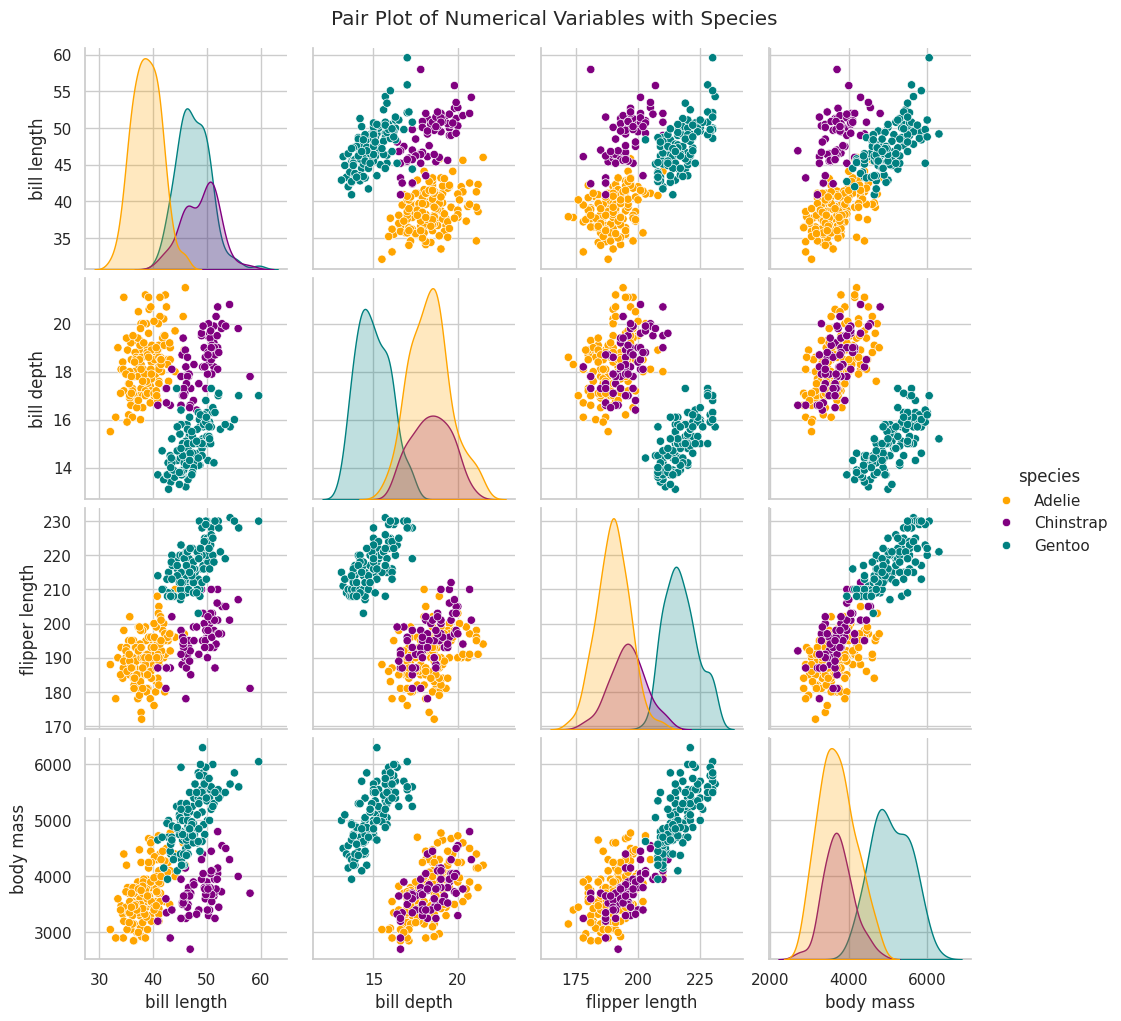

In [203]:
sns.pairplot(data=penguins, vars=penguins.columns[2:6], hue='species', palette=palette)

plt.suptitle('Pair Plot of Numerical Variables with Species', y=1.02)
plt.show()

**Nhận xét:**

- Mỗi ô trong biểu đồ thể hiện mối quan hệ giữa hai đặc điểm cụ thể. Các cặp biến được so sánh theo từng loài chim (được thể hiện bằng màu sắc khác nhau: vàng cho Adelie, tím cho Chinstrap, và xanh lam cho Gentoo).

- Các đường cong trên các ô đường chéo chính là biểu đồ phân phối của từng đặc điểm, hiển thị cách từng loài phân bố cho mỗi đặc điểm cụ thể.

- Các ô không nằm trên đường chéo là biểu đồ phân tán (scatter plot) thể hiện mối quan hệ giữa hai biến.

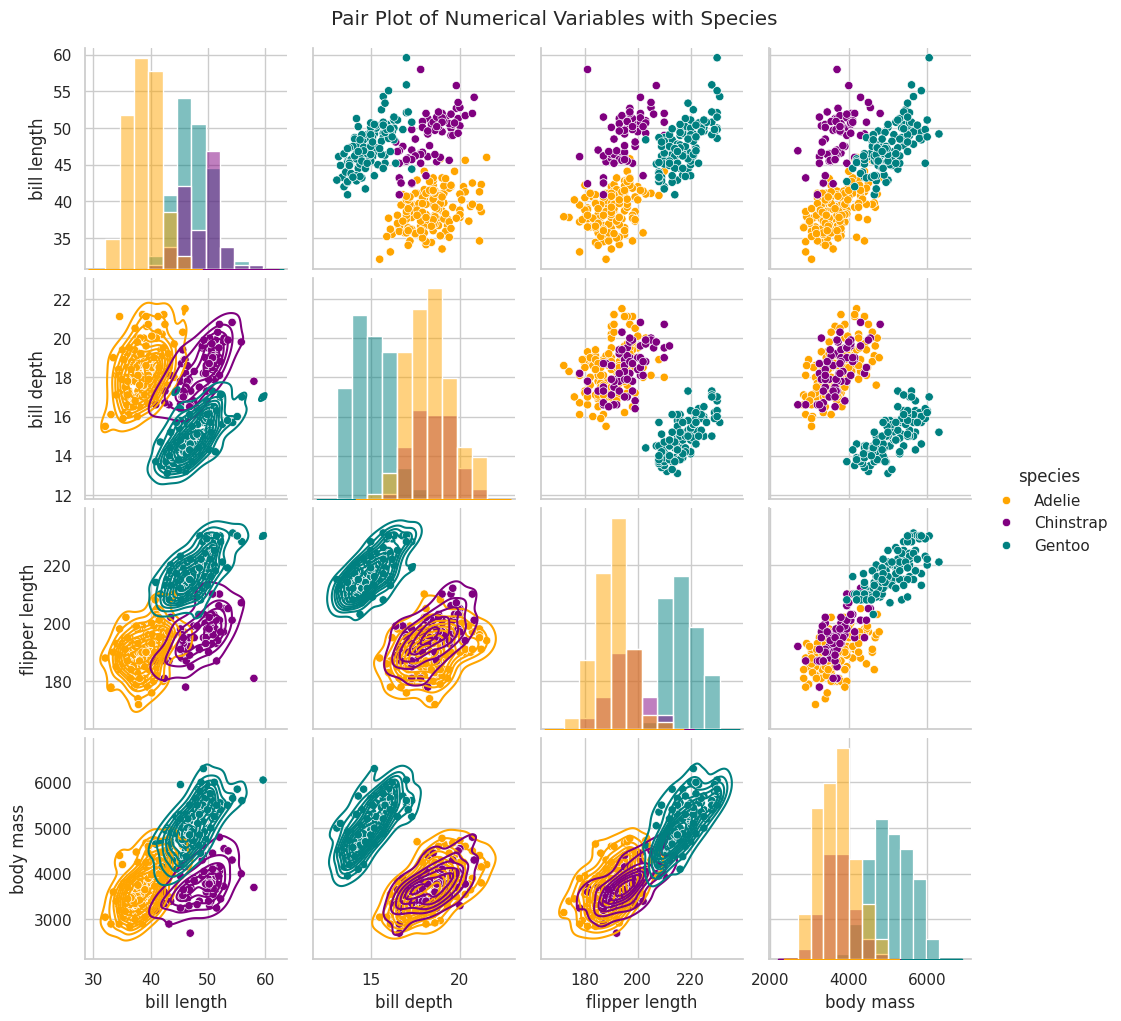

In [204]:
g = sns.pairplot(data=penguins, vars=penguins.columns[2:6], hue='species', palette=palette)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)

plt.suptitle('Pair Plot of Numerical Variables with Species', y=1.02)
plt.show()

**Nhận xét:**

- Biểu đồ trên là một pairplot với các đường đẳng mức, được sử dụng để thể hiện mối quan hệ giữa các cặp biến số khác nhau, đồng thời phân loại theo loài chim cánh cụt.

- Biểu đồ phân tán: Các ô không nằm trên đường chéo thể hiện mối quan hệ giữa hai đặc điểm trên cơ thể chim cánh cụt.

- Trên đường chéo, các biểu đồ phân phối cho từng biến được hiển thị, cho thấy cách mỗi loài phân bố ở từng đặc điểm.

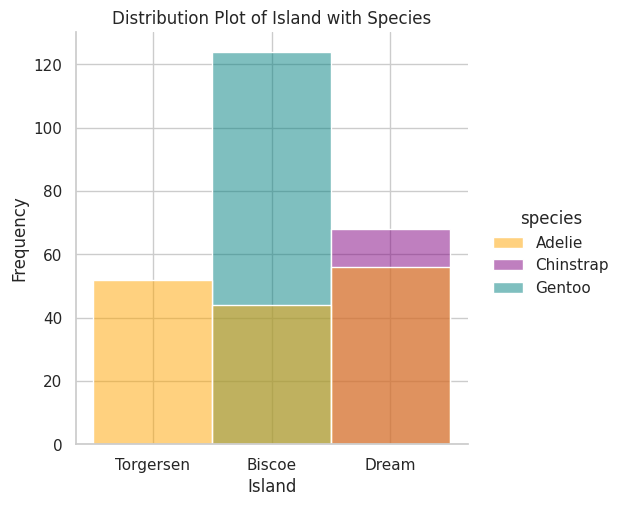

In [205]:
sns.displot(data=penguins, x='island', hue='species', palette=palette)

plt.title('Distribution Plot of Island with Species')
plt.xlabel('Island')
plt.ylabel('Frequency')
plt.show()

**Nhận xét:**

- **Torgersen Island:** Loài Adelie (màu vàng) chiếm toàn bộ số lượng chim cánh cụt trên đảo này. Không có sự xuất hiện của loài Chinstrap hay Gentoo.

- **Biscoe Island:** Đảo này có số lượng chim cánh cụt nhiều nhất, với loài Gentoo (màu xanh lam) chiếm ưu thế lớn. Loài Adelie cũng có mặt nhưng với số lượng ít hơn nhiều so với Gentoo. Không có mẫu của loài Chinstrap trên đảo này.

- **Dream Island:** Có sự hiện diện của cả ba loài chim cánh cụt: Adelie, Chinstrap (màu tím), và Gentoo. Loài Chinstrap có mặt chủ yếu ở đảo này.
Adelie và Gentoo cũng có mặt với số lượng tương đối.

**CÁC CÁCH PLOT KHÁC**

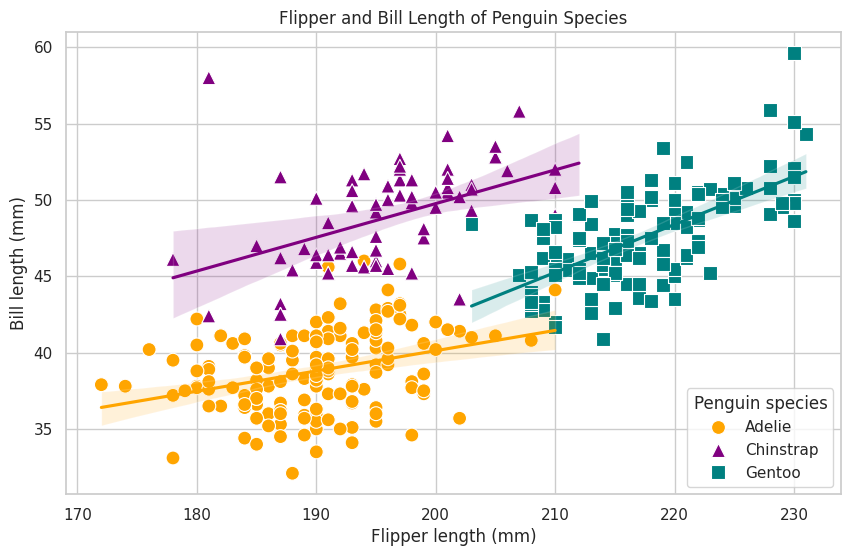

In [206]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="flipper length",
    y="bill length",
    hue="species",
    style="species",
    markers={"Adelie": "o", "Chinstrap": "^", "Gentoo": "s"},
    palette={"Adelie": "orange", "Chinstrap": "purple", "Gentoo": "teal"},
    data=penguins,
    s=100
)

sns.regplot(
    x="flipper length",
    y="bill length",
    data=penguins[penguins['species'] == 'Adelie'],
    scatter=False,
    color="orange"
)
sns.regplot(
    x="flipper length",
    y="bill length",
    data=penguins[penguins['species'] == 'Chinstrap'],
    scatter=False,
    color="purple"
)
sns.regplot(
    x="flipper length",
    y="bill length",
    data=penguins[penguins['species'] == 'Gentoo'],
    scatter=False,
    color="teal"
)

plt.title("Flipper and Bill Length of Penguin Species")
plt.xlabel("Flipper length (mm)")
plt.ylabel("Bill length (mm)")

plt.legend(title='Penguin species')
plt.show()

**Nhận xét:**
- Mối quan hệ tuyến tính dương ở ba loài chim cánh cục, khi chiều dài cánh tăng thì chiều dài mỏ cũng tăng.
- Chim cánh cụt Gentoo có xu hướng cánh dài nhất và mỏ dài nhất, đồng thời dữ liệu của loài chim này có sự phân tán rộng hơn với hai loài chim còn lại.
- Chiều dài cánh và chiều dài mỏ của hai loài Adelie và Chinstrap có sự phân tán hẹp hơn, hai thuộc tính này của hai loài có sự nhất quán hơn

**Heatmap** là biểu đồ sử dụng cường độ màu sắc để thể hiện độ lớn của giá trị. Khi đó **các giá trị lớn sẽ được làm nổi bật bằng các vùng màu có cường độ ánh sáng mạnh** và các giá trị nhỏ hơn sẽ được thể hiện bằng các mảng màu nhạt hơn.

**Hệ số tương quan** là một thước đo thống kê dùng để xác định **mức độ và hướng của mối quan hệ giữa hai biến số**. Hệ số tương quan có giá trị từ -1 đến 1:

- 1: Tương quan hoàn toàn dương (biến này tăng thì biến kia cũng tăng).
- 0: Không có tương quan (không có mối quan hệ tuyến tính giữa các biến).
- -1: Tương quan hoàn toàn âm (biến này tăng thì biến kia giảm).

**Công thức hệ số tương quan Pearson**

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$

**Trong đó:**
- $x_i$: Các giá trị của biến x
- $y_i$: Các giá trị của biến y
- x̄: Trung bình của biến (x), được tính bằng:
  x̄ = (1/n) Σ xi
  
- ȳ: Trung bình của biến (y), được tính bằng:
  ȳ = (1/n) Σ yi

Với bảng dữ liệu trên, em sẽ vẽ biểu đồ hệ số tương quan dưới dạng heatmap cho các đặc trưng của bộ dữ liệu. Thay đổi giá trị của hai thuộc tính island và sex như bên dưới:

In [207]:
penguins_copy_for_heatmap = penguins.copy()

penguins_copy_for_heatmap['island'].replace({'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}, inplace=True)
penguins_copy_for_heatmap['sex'].replace({'Male': 0, 'Female': 1}, inplace=True)

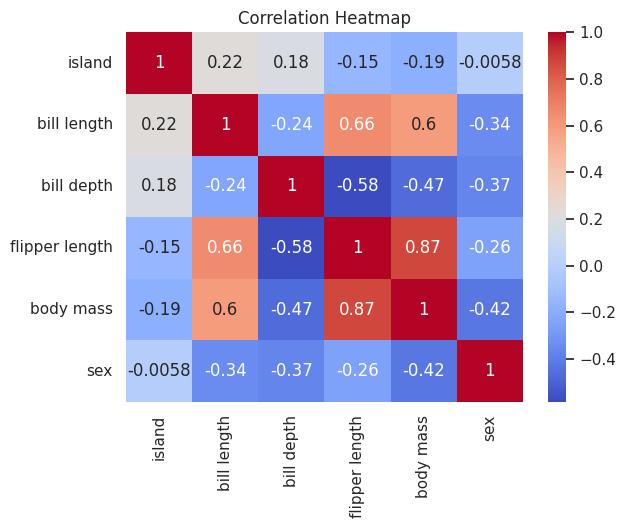

In [208]:
sns.heatmap(penguins_copy_for_heatmap.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()


**Tương quan dương mạnh:**
- flipper length và body mass có tương quan cao nhất với giá trị 0.87. Điều này có nghĩa là khi chiều dài vây tăng, khối lượng cơ thể cũng có xu hướng tăng.
- bill length và flipper length có tương quan 0.66, thể hiện mối quan hệ cùng chiều khá mạnh giữa chiều dài mỏ và chiều dài vây.

**Tương quan âm mạnh:** bill depth và flipper length có tương quan âm (-0.58), nghĩa là khi độ sâu của mỏ tăng, chiều dài vây có xu hướng giảm.

**Tương quan trung bình:**

- body mass và bill length có tương quan dương ở mức 0.60.
- sex có tương quan âm với một số biến như body mass (-0.42) và bill length (-0.34), nhưng mức độ không quá mạnh.

**Tương quan yếu:** island dường như có mối tương quan rất yếu với các biến còn lại, với giá trị tương quan gần 0.

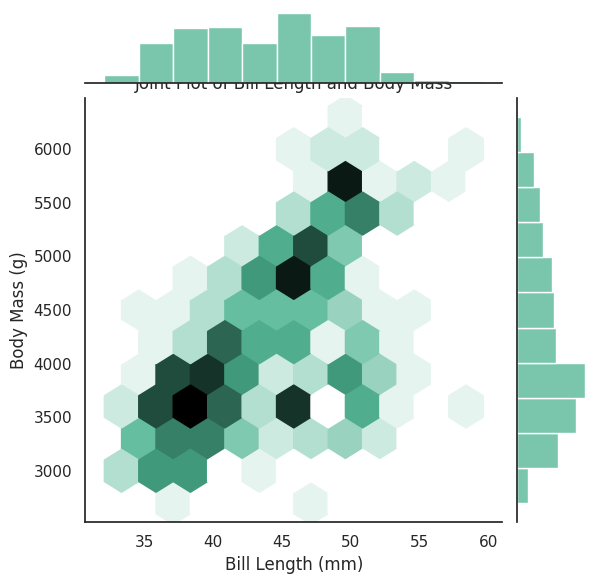

In [209]:
with sns.axes_style('white'):
    sns.jointplot(x="bill length", y="body mass", data=penguins, kind="hex", color="#4CB391")

plt.title("Joint Plot of Bill Length and Body Mass")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

**Nhận xét:**
- Biểu đồ cho thấy mối quan hệ tương quan dương giữa chiều dài mỏ và khối lượng cơ thể. Khi chiều dài mỏ tăng, khối lượng cơ thể cũng có xu hướng tăng lên.
- Những vùng tối hơn trong biểu đồ (các ô lục giác đậm màu) thể hiện các khu vực mà số lượng mẫu cao hơn.

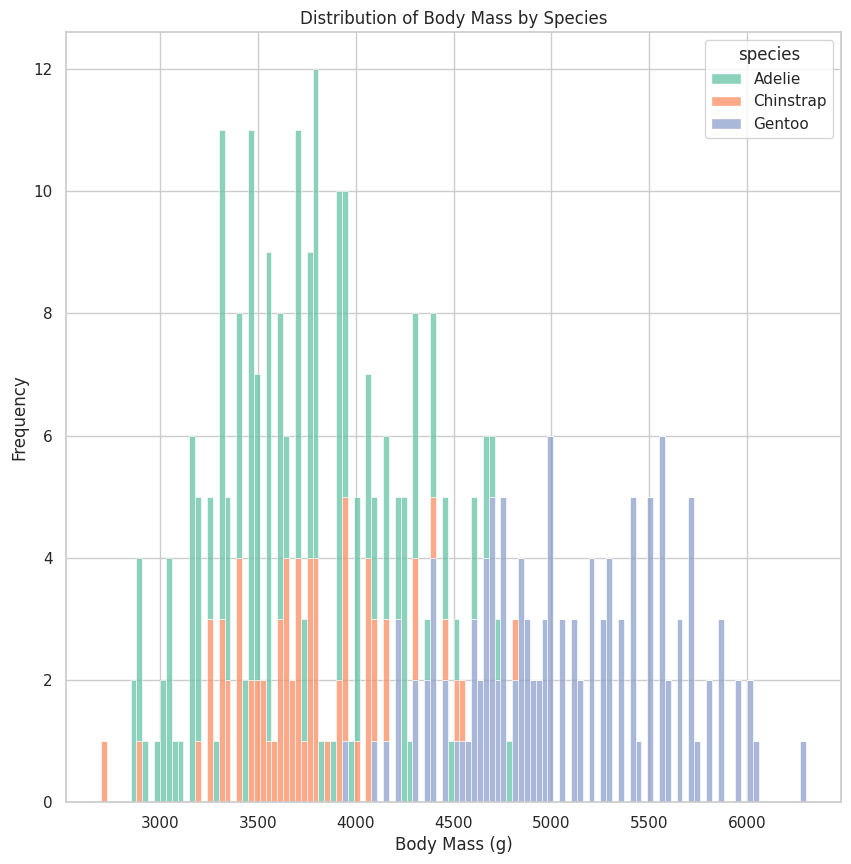

In [210]:
plt.figure(figsize=(10, 10))

sns.histplot(data=penguins, x='body mass', hue='species', multiple='stack', palette='Set2', binwidth=30)

plt.title('Distribution of Body Mass by Species')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()

**Nhận xét:**
- Loài Gentoo có khối lượng cơ thể vượt trội hơn so với hai loài còn lại.
- Loài Adelie và Gentoo có sự phân biệt rất rõ về khối lượng cơ thể.
- Loài Adelie có khối lượng cơ thể nhỏ, dao động từ 2700g đến khoảng 4000 g, đa số cá thể loài này tập trung ở khoảng 3000-3500g.
- Loài Gentoo có khối lượng cơ thể lớn nhất, dao động từ 4000g đến hơn 6000g, đa số cá thể tập trung trong khoảng 3500-4000g.
- Loài Chinstrap có sự chồng chéo về khối lượng so với hai loài kia.

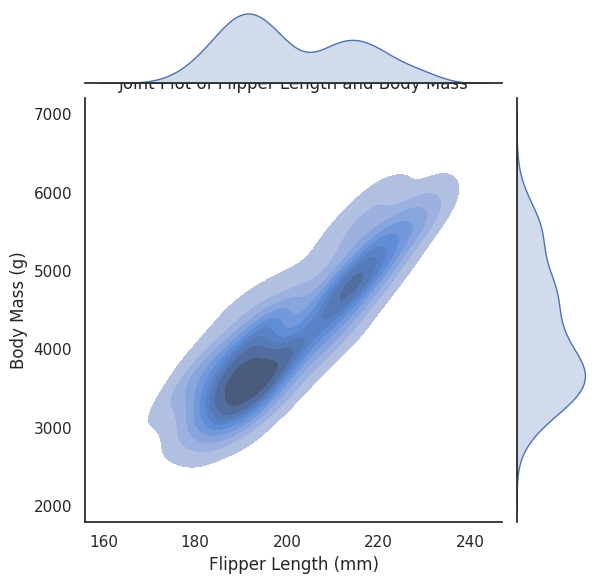

In [211]:
with sns.axes_style('white'):
    sns.jointplot(x="flipper length", y="body mass", data=penguins, kind="kde", fill=True)

plt.title("Joint Plot of Flipper Length and Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

**Nhận xét:**

Biểu đồ Jointplot với phương pháp Kernel Density Estimate (KDE) cho thấy một **mối tương quan tích cực** rõ ràng giữa chiều dài vây và khối lượng cơ thể của chim cánh cụt. Khi chiều dài vây tăng, khối lượng cơ thể của chim cánh cụt cũng có xu hướng tăng lên.

**Vùng tô đậm:** Các đường đẳng mức và vùng màu xanh đậm biểu thị vùng có **mật độ mẫu dữ liệu cao**. Càng đậm màu thì mật độ dữ liệu càng dày đặc, tức là nhiều cá thể có chiều dài vây và khối lượng cơ thể tương ứng rơi vào vùng đó.

**XỬ LÝ DỮ LIỆU**

Trong bảng dữ liệu, các cột bill_length_mm, bill_depth_mm,	flipper_length_mm, body_mass_g và sex có các giá trị NaN.

**Cách 1:**



Đầu tiên, đối với các cột bill_length_mm, bill_depth_mm, flipper_length_mm và body_mass_g, chúng ta sẽ kiểm tra phân phối của từng cột dữ liệu.

"Skewed" trong thống kê dùng để chỉ sự lệch trong phân phối của dữ liệu. Một phân phối được gọi là lệch (skewed) khi các giá trị không được phân bố đối xứng quanh giá trị trung tâm (giá trị trung bình):

- Nếu skewness gần bằng 0, tức là phân phối đối xứng, bạn có thể dùng trung bình.
- Nếu skewness lớn hơn 0 (lệch phải) hoặc nhỏ hơn 0 (lệch trái), trung vị là lựa chọn tốt hơn.

In [212]:
selected_columns_for_skewness_check = ['bill length', 'bill depth', 'flipper length', 'body mass']

for column in selected_columns_for_skewness_check:
    skewness = penguins[column].skew()
    print(f"Skewness for {column}: {skewness}")

Skewness for bill length: 0.05311806699132413
Skewness for bill depth: -0.1434646251943698
Skewness for flipper length: 0.34568183286876963
Skewness for body mass: 0.470329330480123


**Nhận xét:**

bill length và bill depth: Vì độ lệch nhỏ, nên em quyết định sử dụng trung bình.

flipper length: Vì độ lệch dương khá lớn, trung vị là lựa chọn phù hợp hơn.

body mass: Vì độ lệch dương rất lớn, trung vị là lựa chọn tốt nhất.

In [213]:
bill_length_mean = penguins['bill length'].mean()
bill_depth_mean = penguins['bill depth'].mean()
flipper_length_median = penguins['flipper length'].median()
body_mass_median = penguins['body mass'].median()

print('Mean of bill length:', bill_length_mean)
print('Mean of bill depth:', bill_depth_mean)
print('Median of flipper length:', flipper_length_median)
print('Median of body mass:', body_mass_median)

Mean of bill length: 43.9219298245614
Mean of bill depth: 17.151169590643278
Median of flipper length: 197.0
Median of body mass: 4050.0


In [214]:
penguins_copy = penguins.copy()

penguins_copy['bill length'].fillna(bill_length_mean, inplace=True)
penguins_copy['bill depth'].fillna(bill_depth_mean, inplace=True)
penguins_copy['flipper length'].fillna(flipper_length_median, inplace=True)
penguins_copy['body mass'].fillna(body_mass_median, inplace=True)

Đối với cột sex (giới tính), em sẽ điền giá trị phổ biển hơn (Male hoặc Female). Ta có thể thấy, số lượng chim cánh cụt đực nhiều hơn số lượng chim cánh cụt cái (168 > 165) nên các ô NaN của cột sex sẽ được điền bằng giá trị Male.

In [215]:
count_sex_male = penguins_copy['sex'].value_counts()['Male']
count_sex_female = penguins_copy['sex'].value_counts()['Female']

print('The number of male penguins:', count_sex_male)
print('The number of female penguins:', count_sex_female)

The number of male penguins: 168
The number of female penguins: 165


In [216]:
penguins_copy['sex'].fillna('Male', inplace=True)

In [217]:
penguins_copy

species     island  bill length  bill depth  flipper length  body mass  \
0    Adelie  Torgersen     39.10000    18.70000           181.0     3750.0   
1    Adelie  Torgersen     39.50000    17.40000           186.0     3800.0   
2    Adelie  Torgersen     40.30000    18.00000           195.0     3250.0   
3    Adelie  Torgersen     43.92193    17.15117           197.0     4050.0   
4    Adelie  Torgersen     36.70000    19.30000           193.0     3450.0   
..      ...        ...          ...         ...             ...        ...   
339  Gentoo     Biscoe     43.92193    17.15117           197.0     4050.0   
340  Gentoo     Biscoe     46.80000    14.30000           215.0     4850.0   
341  Gentoo     Biscoe     50.40000    15.70000           222.0     5750.0   
342  Gentoo     Biscoe     45.20000    14.80000           212.0     5200.0   
343  Gentoo     Biscoe     49.90000    16.10000           213.0     5400.0   

        sex  
0      Male  
1    Female  
2    Female  
3      Male  
4    Female  
..      ...  
339    Male  
340  Female  
341    Male  
342  Female  
343    Male  

[344 rows x 7 columns]

In [218]:
species_values = penguins_copy['species'].unique()
island_values = penguins_copy['island'].unique()
sex_values = penguins_copy['sex'].unique()

print('Species values:', species_values)
print('Island values:', island_values)
print('Sex values:', sex_values)

Species values: ['Adelie' 'Chinstrap' 'Gentoo']
Island values: ['Torgersen' 'Biscoe' 'Dream']
Sex values: ['Male' 'Female']


**Thay đổi giá trị của các cột species, island và sex:**

- Cột species: Các giá trị Adelie, Chinstrap và Gentoo sẽ được thay thế lần lượt là 0, 1, 2.
- Cột islands: Các giá trị Torgersen, Biscoe và Dream sẽ được thay thế lần lượt là 0, 1, 2.
- Cột sex: Những con đực sẽ mang giá trị 0 và những con cái sẽ mang giá trị 1.

In [219]:
penguins_copy['species'].replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}, inplace=True)
penguins_copy['island'].replace({'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}, inplace=True)
penguins_copy['sex'].replace({'Male': 0, 'Female': 1}, inplace=True)

In [220]:
penguins_copy

species  island  bill length  bill depth  flipper length  body mass  sex
0          0       0     39.10000    18.70000           181.0     3750.0    0
1          0       0     39.50000    17.40000           186.0     3800.0    1
2          0       0     40.30000    18.00000           195.0     3250.0    1
3          0       0     43.92193    17.15117           197.0     4050.0    0
4          0       0     36.70000    19.30000           193.0     3450.0    1
..       ...     ...          ...         ...             ...        ...  ...
339        2       1     43.92193    17.15117           197.0     4050.0    0
340        2       1     46.80000    14.30000           215.0     4850.0    1
341        2       1     50.40000    15.70000           222.0     5750.0    0
342        2       1     45.20000    14.80000           212.0     5200.0    1
343        2       1     49.90000    16.10000           213.0     5400.0    0

[344 rows x 7 columns]

**Cách 2:** Em sẽ loại bỏ tất cả các dòng có giá trị dữ liệu NaN.

**Thay đổi giá trị của các cột species, island và sex:**

- Cột species: Các giá trị Adelie, Chinstrap và Gentoo sẽ được thay thế lần lượt là 0, 1, 2.
- Cột islands: Các giá trị Torgersen, Biscoe và Dream sẽ được thay thế lần lượt là 0, 1, 2.
- Cột sex: Những con đực sẽ mang giá trị 0 và những con cái sẽ mang giá trị 1.

In [221]:
drop_null_penguins = penguins.dropna()

num_rows_before = penguins.shape[0]
num_rows_after = drop_null_penguins.shape[0]

print('Number of rows before:', num_rows_before)
print('Number of rows after:', num_rows_after)
print('Number of rows dropped:', num_rows_before - num_rows_after)

Number of rows before: 344
Number of rows after: 333
Number of rows dropped: 11


In [222]:
drop_null_penguins['species'].replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}, inplace=True)
drop_null_penguins['island'].replace({'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}, inplace=True)
drop_null_penguins['sex'].replace({'Male': 0, 'Female': 1}, inplace=True)

<ipython-input-222-5901af695278>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_null_penguins['species'].replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}, inplace=True)
<ipython-input-222-5901af695278>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_null_penguins['island'].replace({'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}, inplace=True)
<ipython-input-222-5901af695278>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dro

In [223]:
drop_null_penguins = drop_null_penguins.reset_index(drop=True)
drop_null_penguins

species  island  bill length  bill depth  flipper length  body mass  sex
0          0       0         39.1        18.7           181.0     3750.0    0
1          0       0         39.5        17.4           186.0     3800.0    1
2          0       0         40.3        18.0           195.0     3250.0    1
3          0       0         36.7        19.3           193.0     3450.0    1
4          0       0         39.3        20.6           190.0     3650.0    0
..       ...     ...          ...         ...             ...        ...  ...
328        2       1         47.2        13.7           214.0     4925.0    1
329        2       1         46.8        14.3           215.0     4850.0    1
330        2       1         50.4        15.7           222.0     5750.0    0
331        2       1         45.2        14.8           212.0     5200.0    1
332        2       1         49.9        16.1           213.0     5400.0    0

[333 rows x 7 columns]

**Cách 3:** Em sẽ thay các ô có giá trị NaN bằng số 0, ngoại trừ cột sex (giới tính)

**Thay đổi giá trị của các cột species và island:**

- Cột species: Các giá trị Adelie, Chinstrap và Gentoo sẽ được thay thế lần lượt là 0, 1, 2.
- Cột islands: Các giá trị Torgersen, Biscoe và Dream sẽ được thay thế lần lượt là 0, 1, 2.

**Cột sex (giới tính):** Số lượng chim cánh cụt đực và số lượng chim cánh cụt cái của cột sex vẫn không thay đổi sau khi thay các giá trị NaN (Ngoại trừ cột sex) bằng số 0. Số lượng chim cánh cụt đực vẫn nhiều hơn số lượng chim cánh cụt cái (168 > 165) nên các ô mang giá trị NaN của cột sex vẫn mang giá trị Male.

Sau đó ta tiến thành thay đổi giá trị cho cột sex với Male bằng số 0 và Female bằng số 1.

In [224]:
fillna_with_0_penguins['sex'].fillna('Male', inplace=True)

In [225]:
fillna_with_0_penguins = penguins.fillna(0)

fillna_with_0_penguins['species'].replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}, inplace=True)
fillna_with_0_penguins['island'].replace({'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}, inplace=True)
fillna_with_0_penguins['sex'].replace({'Male': 0, 'Female': 1}, inplace=True)

In [226]:
fillna_with_0_penguins

species  island  bill length  bill depth  flipper length  body mass  sex
0          0       0         39.1        18.7           181.0     3750.0    0
1          0       0         39.5        17.4           186.0     3800.0    1
2          0       0         40.3        18.0           195.0     3250.0    1
3          0       0          0.0         0.0             0.0        0.0    0
4          0       0         36.7        19.3           193.0     3450.0    1
..       ...     ...          ...         ...             ...        ...  ...
339        2       1          0.0         0.0             0.0        0.0    0
340        2       1         46.8        14.3           215.0     4850.0    1
341        2       1         50.4        15.7           222.0     5750.0    0
342        2       1         45.2        14.8           212.0     5200.0    1
343        2       1         49.9        16.1           213.0     5400.0    0

[344 rows x 7 columns]

**CHIA DỮ LIỆU THÀNH TẬP TRAIN VÀ TẬP TEST**

Import hàm **train_test_split** từ module **model_selection** của thư viện **scikit-learn**. Hàm này được sử dụng để chia tập dữ liệu thành hai phần: tập huấn luyện (train set) và tập kiểm tra (test set). Trong đó:

- **X_train, X_test:** Dữ liệu đặc điểm tương ứng cho tập huấn luyện và tập kiểm tra.
- **y_train, y_test:** Dữ liệu nhãn tương ứng cho tập huấn luyện và tập kiểm tra.
-**test_split:** Tham số này chỉ định tỷ lệ của tập dữ liệu được sử dụng làm tập kiểm tra. Ở đây, test_size=0.2 nghĩa là 20% dữ liệu sẽ được dùng để kiểm tra mô hình, và 80% sẽ được dùng để huấn luyện mô hình.
- **random_state:** Đây là hạt giống ngẫu nhiên (seed) được sử dụng để đảm bảo rằng việc chia dữ liệu diễn ra một cách nhất quán. Khi chúng ta đặt random_state=42, kết quả chia tập dữ liệu sẽ luôn giống nhau mỗi khi bạn chạy lại mã.
- Nếu không đặt random_state, kết quả của train_test_split có thể thay đổi mỗi lần chạy.

**Chia theo cách xử lý dữ liệu thứ nhất**

In [227]:
from sklearn.model_selection import train_test_split

X = penguins_copy.drop('species', axis=1)
y = penguins_copy['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23520899)

**Chia theo cách xử lý dữ liệu thứ hai**

In [228]:
X_2 = drop_null_penguins.drop('species', axis=1)
y_2 = drop_null_penguins['species']

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=23520899)

**Chia theo cách xử lý dữ liệu thứ ba**

In [229]:
X_3 = fillna_with_0_penguins.drop('species', axis=1)
y_3 = fillna_with_0_penguins['species']

X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.2, random_state=23520899)

**SỬ DỤNG DECISION TREE ĐỂ PHÂN LOẠI 3 LOÀI CHIM CÁNH CỤT**

X: Tập hợp các cột island, bill length, bill depth, flipper length, body mass, sex của bảng dữ liệu thể hiện các đặc trưng khác nhau.

y: Cột species của bảng dữ liệu chứa giá trị phân loại 3 loài chim cánh cụt.

**HUẤN LUYỆN TRÊN CÁCH CHIA THỨ NHẤT**

In [230]:
for m in range(1, 21):
    model = DecisionTreeClassifier(max_depth=m, random_state=23520899)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy for max_depth {m}: {accuracy}")

Accuracy for max_depth 1: 0.855072463768116
Accuracy for max_depth 2: 0.927536231884058
Accuracy for max_depth 3: 0.9420289855072463
Accuracy for max_depth 4: 0.9710144927536232
Accuracy for max_depth 5: 0.9710144927536232
Accuracy for max_depth 6: 0.9710144927536232
Accuracy for max_depth 7: 0.9710144927536232
Accuracy for max_depth 8: 0.9710144927536232
Accuracy for max_depth 9: 0.9710144927536232
Accuracy for max_depth 10: 0.9710144927536232
Accuracy for max_depth 11: 0.9710144927536232
Accuracy for max_depth 12: 0.9710144927536232
Accuracy for max_depth 13: 0.9710144927536232
Accuracy for max_depth 14: 0.9710144927536232
Accuracy for max_depth 15: 0.9710144927536232
Accuracy for max_depth 16: 0.9710144927536232
Accuracy for max_depth 17: 0.9710144927536232
Accuracy for max_depth 18: 0.9710144927536232
Accuracy for max_depth 19: 0.9710144927536232
Accuracy for max_depth 20: 0.9710144927536232


**Nhận xét:**

- Với mô hình Decision Tree, giá trị của hyperparameter `max_depth` kiểm soát độ phức tạp của cây. Khi tăng `max_depth`, mô hình có thể học được nhiều chi tiết hơn từ dữ liệu.

- Khi `max_depth` tăng từ 1 đến 3, độ chính xác trên tập test tăng nhanh chóng, đạt mức từ 85.5% lên 94.2%.

- Từ `max_depth` = 4 trở đi, độ chính xác không còn tăng thêm mà giữ ổn định ở mức 97.1%.

- Khi `max_depth` quá nhỏ (như 1 hoặc 2), mô hình có thể không đủ phức tạp để nắm bắt được các mối quan hệ quan trọng, dẫn đến độ chính xác nhỏ hơn khi sử dụng các `max_depth` lớn hơn.

- Việc tăng `max_depth` quá cao có thể dẫn đến overfitting, nơi mô hình trở nên quá phức tạp và học quá chi tiết các điểm dữ liệu huấn luyện

- `max_depth` = 4 có vẻ là giá trị tối ưu, mang lại độ chính xác cao mà không làm tăng độ phức tạp của mô hình.

**HUẤN LUYỆN TRÊN CÁCH CHIA THỨ HAI**

In [231]:
for n in range(1, 21):
    model = DecisionTreeClassifier(max_depth=n, random_state=23520899)
    model.fit(X_2_train, y_2_train)
    accuracy = model.score(X_2_test, y_2_test)
    print(f"Accuracy for max_depth {n}: {accuracy}")

Accuracy for max_depth 1: 0.7611940298507462
Accuracy for max_depth 2: 0.9253731343283582
Accuracy for max_depth 3: 0.9552238805970149
Accuracy for max_depth 4: 0.9552238805970149
Accuracy for max_depth 5: 0.9552238805970149
Accuracy for max_depth 6: 0.9552238805970149
Accuracy for max_depth 7: 0.9552238805970149
Accuracy for max_depth 8: 0.9552238805970149
Accuracy for max_depth 9: 0.9552238805970149
Accuracy for max_depth 10: 0.9552238805970149
Accuracy for max_depth 11: 0.9552238805970149
Accuracy for max_depth 12: 0.9552238805970149
Accuracy for max_depth 13: 0.9552238805970149
Accuracy for max_depth 14: 0.9552238805970149
Accuracy for max_depth 15: 0.9552238805970149
Accuracy for max_depth 16: 0.9552238805970149
Accuracy for max_depth 17: 0.9552238805970149
Accuracy for max_depth 18: 0.9552238805970149
Accuracy for max_depth 19: 0.9552238805970149
Accuracy for max_depth 20: 0.9552238805970149


**Nhận xét:** Mô hình có độ chính xác cao rõ rệt từ max_depth = 3 và duy trì tương đối ổn định ở các giá trị max_depth lớn hơn.

**HUẤN LUYỆN TRÊN CÁCH CHIA THỨ BA**

In [232]:
for k in range(1, 21):
    model = DecisionTreeClassifier(max_depth=k, random_state=23520899)
    model.fit(X_3_train, y_3_train)
    accuracy = model.score(X_3_test, y_3_test)
    print(f"Accuracy for max_depth {k}: {accuracy}")

Accuracy for max_depth 1: 0.855072463768116
Accuracy for max_depth 2: 0.927536231884058
Accuracy for max_depth 3: 0.9420289855072463
Accuracy for max_depth 4: 0.9565217391304348
Accuracy for max_depth 5: 0.9855072463768116
Accuracy for max_depth 6: 0.9565217391304348
Accuracy for max_depth 7: 0.9565217391304348
Accuracy for max_depth 8: 0.9565217391304348
Accuracy for max_depth 9: 0.9565217391304348
Accuracy for max_depth 10: 0.9565217391304348
Accuracy for max_depth 11: 0.9565217391304348
Accuracy for max_depth 12: 0.9565217391304348
Accuracy for max_depth 13: 0.9565217391304348
Accuracy for max_depth 14: 0.9565217391304348
Accuracy for max_depth 15: 0.9565217391304348
Accuracy for max_depth 16: 0.9565217391304348
Accuracy for max_depth 17: 0.9565217391304348
Accuracy for max_depth 18: 0.9565217391304348
Accuracy for max_depth 19: 0.9565217391304348
Accuracy for max_depth 20: 0.9565217391304348


**Nhận xét**: Cách này cũng cho độ chính xác cao nhất tại max_depth = 5 (0.986) và sau đó giảm còn 0.957 ở các max_depth cao hơn.

**Nhận xét chung:**

- Ba mô hình được train với 3 tập dữ liệu đều cho ra độ chính xác tương đối cao.
- Với cách 1, khi thay giá trị các ô bằng mean hoặc median của cột tương ứng, sẽ giúp tránh mất thông tin của dữ liệu. Tuy nhiên, nếu thuộc tính NaN có ý nghĩa quan trọng, thì trung bình và trung vị có thể làm méo mó dữ liệu.
- Với cách 2, khi loại bỏ quá nhiều hàng với dữ liệu NaN, sẽ làm cho dữ liệu bị thiếu nghiêm trọng, làm ảnh hướng đến chất lượng mô hình.
- Với cách 3, thay giá trị của các ô NaN bằng con số 0, đây không phải là cách xử lý dữ liệu đúng và có thể tạo ra các mô hình thiên lệch và không chính xác.

**IN RA CLASSIFICATION REPORT VÀ CONFUSION MATRIX CHO MODEL VỚI MAX DEPTH BẰNG 4 VÀ CHIA TẬP TRAIN, TẬP TEST THEO CÁCH 1**

In [233]:
from sklearn.metrics import classification_report, confusion_matrix

In [234]:
model = DecisionTreeClassifier(max_depth=4, random_state=23520899)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=23520899)

### **Accuracy:**
Tỷ lệ dự đoán đúng trên tổng số dự đoán.
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

### **Class-specific Precision:**

$$
\text{Precision}_i = \frac{TP_i}{TP_i + FP_i}
$$

**Trong đó:**

- $TP_i$ là số lượng mẫu thuộc lớp $i$ được dự đoán đúng (True Positives).
- $FP_i$ là số lượng mẫu không thuộc lớp $i$ nhưng bị dự đoán nhầm là thuộc lớp $i$ (False Positives).

#### **Macro Precision:**
Tính Precision cho từng nhãn, rồi lấy trung bình cộng.
$$
\text{Precision}_{\text{macro}} = \frac{1}{n} \sum_{i=1}^{n} \frac{TP_i}{TP_i + FP_i}
$$

#### **Weighted Precision:**
Tính Precision cho từng nhãn, rồi lấy trung bình có trọng số.
$$
\text{Precision}_{\text{weighted}} = \frac{\sum_{i=1}^{n} \left( \frac{TP_i}{TP_i + FP_i} \times \text{The number of label \( i \) samples.
} \right)}{\sum_{i=1}^{n} \text{The number of label \( i \) samples.
}}
$$

### **Recall:**
Tỷ lệ mẫu Positive được dự đoán đúng trên tổng số mẫu thực sự là Positive.
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

### **F1-score:**
Trung bình điều hòa giữa Precision và Recall, giúp cân bằng giữa Precision và Recall khi một chỉ số quá cao hoặc quá thấp.
$$
\text{F1-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

In [237]:
report = classification_report(y_test, model.predict(X_test))

print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.89      1.00      0.94         8
           2       1.00      0.97      0.98        31

    accuracy                           0.97        69
   macro avg       0.95      0.98      0.96        69
weighted avg       0.97      0.97      0.97        69



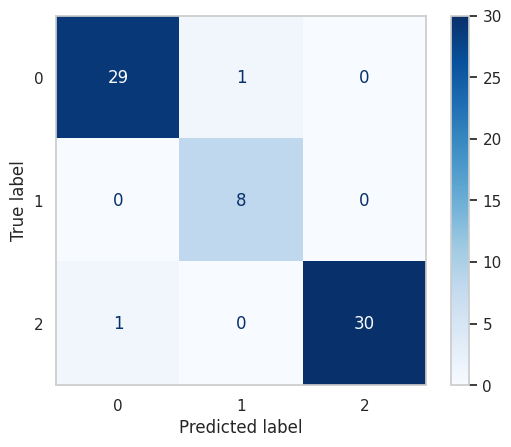

In [238]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
disp.ax_.grid(False)
plt.show()

**Nhận xét:**

Tổng số mẫu trong ma trận là 69 mẫu. Trong đó, 67 mẫu đã được mô hình dự đoán đúng. Điều này cho thấy mô hình có độ chính xác cao, chỉ có 2 trường hợp nhầm lẫn.